In [130]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

In [133]:
shows = pd.read_csv('data/tv_shows.csv')
movies = pd.read_csv('data/movies.csv')
shows.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [134]:
movies.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [135]:
shows = shows.drop(['Unnamed: 0', 'type'], axis=1)

## What type of analysis are we interested in?
1. Which streaming service has the best average reviews?  
2. Which streaming service has the most shows that are highly rated?
3. Which streaming service has the best spread of shows released in different years?

In [136]:
shows[['Netflix', 'Hulu', 'Prime Video', 'Disney+', 'IMDb']]
# Finding average rating for netflix
netflix = shows[shows['Netflix'] == 1][['Netflix', 'IMDb']]
netflix = netflix[netflix['IMDb'].notna()]
netflix_mean = np.mean(netflix['IMDb'])
# hulu
hulu = shows[shows['Hulu'] == 1][['Hulu', 'IMDb']]
hulu = hulu[hulu['IMDb'].notna()]
hulu_mean = np.mean(hulu['IMDb'])
# amazon
amazon = shows[shows['Prime Video'] == 1][['Prime Video', 'IMDb']]
amazon = amazon[amazon['IMDb'].notna()]
amazon_mean = np.mean(amazon['IMDb'])
# disney
disney = shows[shows['Disney+'] == 1][['Disney+', 'IMDb']]
disney = disney[disney['IMDb'].notna()]
disney_mean = np.mean(disney['IMDb'])
means = [netflix_mean, hulu_mean, amazon_mean, disney_mean]
means

[7.163279955825518, 7.0611074489123276, 7.1798010711553095, 6.923668639053257]

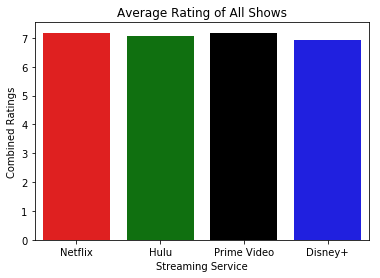

In [137]:
# convert data to dataframe and plot
df_mean = pd.DataFrame({
    'Streaming Service':['Netflix', 'Hulu', 'Prime Video', 'Disney+'],
    'Combined Ratings':means
})
ax = sns.barplot(x='Streaming Service', y='Combined Ratings', data=df_mean, 
                 palette=['red', 'green', 'black', 'blue']).set_title('Average Rating of All Shows')

In [141]:
netflix_good = pd.cut(netflix['IMDb'], 3, labels=['Bad', 'Ok', 'Good']).value_counts().values[0]
hulu_good = pd.cut(hulu['IMDb'], 3, labels=['Bad', 'Ok', 'Good']).value_counts().values[0]
amazon_good = pd.cut(amazon['IMDb'], 3, labels=['Bad', 'Ok', 'Good']).value_counts().values[0]
disney_good = pd.cut(disney['IMDb'], 3, labels=['Bad', 'Ok', 'Good']).value_counts().values[0]
best = [netflix_good, hulu_good, amazon_good, disney_good]
best

[1330, 974, 879, 89]

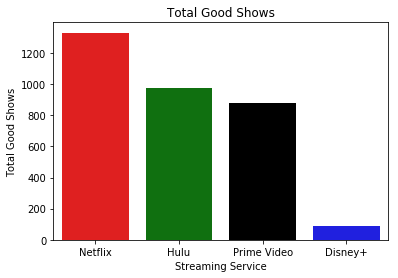

In [139]:
# convert data to dataframe and plot
df_mean = pd.DataFrame({
    'Streaming Service':['Netflix', 'Hulu', 'Prime Video', 'Disney+'],
    'Total Good Shows':best
})
ax = sns.barplot(x='Streaming Service', y='Total Good Shows', data=df_mean, 
                 palette=['red', 'green', 'black', 'blue']).set_title('Total Good Shows')

In [150]:
# Finding the most content from ages
# netflix rating for movie age
netflix = shows[shows['Netflix'] == 1][['Netflix', 'IMDb', 'Year']]
netflix = netflix[netflix['IMDb'].notna()]
netflix['age'] = pd.cut(netflix['Year'], [1950, 1969, 1989, 2009, 2029], 
       labels=["50s and 60s", "70s and 80s","90s and 00s", "10s and 20s"])
netflix_by_age = netflix.groupby('age')['IMDb'].count()
# hulu rating for movie age
hulu = shows[shows['Hulu'] == 1][['Hulu', 'IMDb', 'Year']]
hulu = hulu[hulu['IMDb'].notna()]
hulu['age'] = pd.cut(hulu['Year'], [1950, 1969, 1989, 2009, 2029], 
       labels=["50s and 60s", "70s and 80s","90s and 00s", "10s and 20s"])
hulu_by_age = hulu.groupby('age')['IMDb'].count()
# amazon rating for movie age
amazon = shows[shows['Prime Video'] == 1][['Prime Video', 'IMDb', 'Year']]
amazon = amazon[amazon['IMDb'].notna()]
amazon['age'] = pd.cut(amazon['Year'], [1950, 1969, 1989, 2009, 2029], 
       labels=["50s and 60s", "70s and 80s","90s and 00s", "10s and 20s"])
amazon_by_age = amazon.groupby('age')['IMDb'].count()
# disney rating for movie age
disney = shows[shows['Disney+'] == 1][['Disney+', 'IMDb', 'Year']]
disney = disney[disney['IMDb'].notna()]
disney['age'] = pd.cut(disney['Year'], [1950, 1969, 1989, 2009, 2029], 
       labels=["50s and 60s", "70s and 80s","90s and 00s", "10s and 20s"])
disney_by_age = disney.groupby('age')['IMDb'].count()
netflix_by_age, hulu_by_age, amazon_by_age, disney_by_age
netflix_by_age.values / sum(netflix_by_age)

array([0.00331309, 0.0115958 , 0.11264495, 0.87244616])

In [144]:
# Finding the most content from ages
# netflix rating for movie age
netflix = shows[shows['Netflix'] == 1][['Netflix', 'IMDb', 'Age']]
netflix = netflix[netflix['IMDb'].notna()]
netflix_by_age = netflix.groupby('Age')['IMDb'].count()
# hulu rating for movie age
hulu = shows[shows['Hulu'] == 1][['Hulu', 'IMDb', 'Age']]
hulu = hulu[hulu['IMDb'].notna()]
hulu_by_age = hulu.groupby('Age')['IMDb'].count()
# amazon rating for movie age
amazon = shows[shows['Prime Video'] == 1][['Prime Video', 'IMDb', 'Age']]
amazon = amazon[amazon['IMDb'].notna()]
amazon_by_age = amazon.groupby('Age')['IMDb'].count()
# disney rating for movie age
disney = shows[shows['Disney+'] == 1][['Disney+', 'IMDb', 'Age']]
disney = disney[disney['IMDb'].notna()]
disney_by_age = disney.groupby('Age')['IMDb'].count()
netflix_by_age, hulu_by_age, amazon_by_age, disney_by_age

(Age
 13+      3
 16+    396
 18+    359
 7+     296
 all    169
 Name: IMDb, dtype: int64, Age
 16+    511
 18+    238
 7+     364
 all    156
 Name: IMDb, dtype: int64, Age
 13+      1
 16+    209
 18+    182
 7+     217
 all    185
 Name: IMDb, dtype: int64, Age
 16+     3
 7+     66
 all    80
 Name: IMDb, dtype: int64)